## Implementemos un modelo simple de regresión primero

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

from IPython.display import display
%matplotlib inline

In [2]:
x = pd.read_csv('./data/transformed/peliculas_opening.csv')
x.head(2)

,movie_title,production_budget,budget,imdb_score,opening_gross,screens,duration,title_year,cast_total_facebook_likes,aspect_ratio,worldwide_gross
0,Avatar,425000000,237000000.0,7.9,77025481.0,3452.0,178.0,2009.0,4834,1.78,2783918982
1,Pirates of the Caribbean: At World's End,300000000,300000000.0,7.1,139802190.0,4362.0,169.0,2007.0,48350,2.35,963420425


In [3]:
x.columns.tolist()

['movie_title',
 'production_budget',
 'budget',
 'imdb_score',
 'opening_gross',
 'screens',
 'duration',
 'title_year',
 'cast_total_facebook_likes',
 'aspect_ratio',
 'worldwide_gross']

In [4]:
y = x['worldwide_gross']
x.drop(columns=['worldwide_gross', 'movie_title'], inplace=True)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [6]:
print(len(x))
print(len(x_train))
print(len(x_test))

2247
1348
899


In [7]:
model = Lasso()
model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
y_hat = model.predict(x_test)
y_hat.shape

(899,)

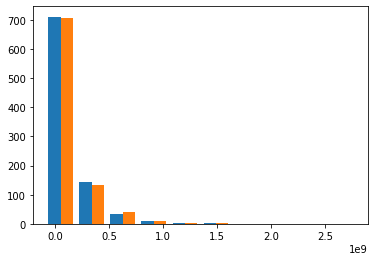

In [9]:
plt.hist([y_hat,y_test]);

## Evaluemos de forma más fina el comportamiento de nuestro modelo

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Los estimadores y las funciones de sklearn vienen con el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En este caso particular la función <code>estimator.score</code> ya viene con una de las métricas de <code>sklearn.metrics</code>, que es la métrica <code>sklearn.metric.r2_score</code>
</div>


<div class="alert alert-success">
  El <strong>score R2</strong> de una regresión es una de las formas más comunes de entender su poder predictivo. Este <strong>mientras más cerca de 1 este, mejor es</strong>
</div>
<div class="alert alert-success">
Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media. 
</div>

In [10]:
accuracy = model.score(x_test, y_test)
print('Accuracy: {:.2%}'.format(accuracy))

Accuracy: 76.66%


Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades. Un ejemplo es el siguiente:

<img src="./img/datasaurus_dozen.png" width="800" style="margin:0 auto;clear:both">
<div class="alert alert-success">
<strong>Siempre visualiza tus resultados</strong>, aunque tengas un buen score de performance.
</div>



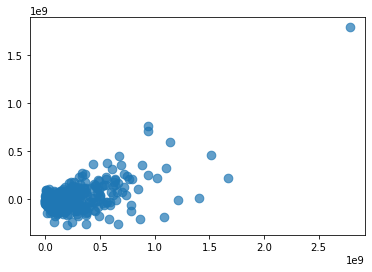

In [11]:
residuals = y_test - y_hat
plt.scatter(y_test,residuals, alpha=0.7, s=75)

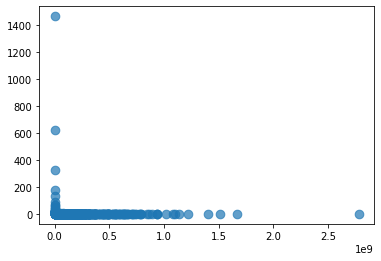

In [12]:
ap_residuals = np.abs(residuals) / y_test
plt.scatter(y_test,ap_residuals, alpha=0.7, s=75)

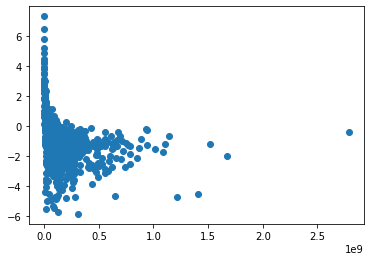

In [13]:
lap_residuals = np.log(ap_residuals)
plt.scatter(y_test,lap_residuals)


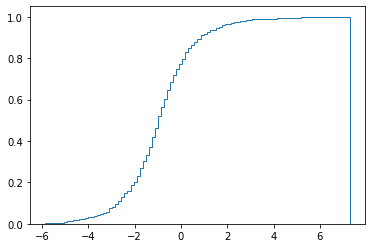

In [14]:
plt.hist(lap_residuals,bins=100, density=True, histtype='step', cumulative=True);

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

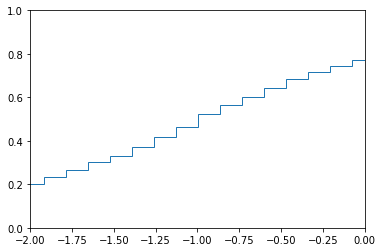

In [15]:
plt.hist(lap_residuals, bins=100, density=True, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

In [16]:
for el in zip(list(x.columns), list(model.coef_)):
    print(el)

('production_budget', 1.2898778649482652)
('budget', 0.01093173330624673)
('imdb_score', 23296311.51754352)
('opening_gross', 5.746106730907365)
('screens', -12287.693353533074)
('duration', 33688.45366576722)
('title_year', 561322.0388779336)
('cast_total_facebook_likes', -84.66213971418526)
('aspect_ratio', -23284212.2719503)


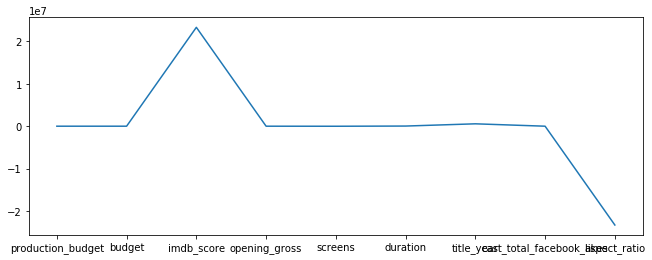

In [17]:
plt.figure(figsize=(11,4))
plt.plot(np.arange(len(model.coef_)),model.coef_)
plt.xticks(np.arange(len(model.coef_)), x.columns.tolist());